# Домашнее задание - Доверительные интервалы

Крутов Андрей

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Задание 1 - Plugin Method

Допустим, мы знаем точно, что 88% американского населения поддерживают увеличение солнечных электростанций. Мы опросили 10 человек и получили следующий результат:

In [5]:
res = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
p = 0.88

Оцените среднее значение, сравните точную и приближенную ошибку.

In [11]:
print('Среднее: {} точная оценка: {} приближенная оценка: {}'.format(np.mean(res), np.sqrt(p*(1-p)/len(res)), np.std(res) ))

Среднее: 1.0 точная оценка: 0.10276186062932104 приближенная оценка: 0.0


Чтобы получить более точный результат, мы опросили 100 человек. Оцените среднее значение и сравните точную и приближенную ошибку.

In [21]:
res2 = np.array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
p_hat = res2.sum()/len(res2)

In [25]:
print('Среднее: {} точная оценка: {} приближенная оценка: {}'.format(np.mean(res2), \
                                                                     np.sqrt(p*(1-p)/len(res2)), \
                                                                     np.sqrt(p_hat*(1-p_hat)/len(res2)) ))

Среднее: 0.92 точная оценка: 0.03249615361854384 приближенная оценка: 0.027129319932501065


In [16]:
len(res2)

100

В конце мы опросили 1000 человек. Оцените среднее значение и сравните точную и приближенную ошибку.

In [28]:
np.random.seed(42)
res3 = stats.binom.rvs(1,0.88, size=1000)

In [27]:
p_hat = res3.sum()/len(res3)

In [29]:
print('Среднее: {} точная оценка: {} приближенная оценка: {}'.format(np.mean(res3), \
                                                                     np.sqrt(p*(1-p)/len(res3)), \
                                                                     np.sqrt(p_hat*(1-p_hat)/len(res3)) ))

Среднее: 0.876 точная оценка: 0.010276186062932104 приближенная оценка: 0.010422283818818216


С ростом количества элементов в выборке приближенная ошибка стремится к точной

## Задание 2 - Пропорция

На практике мы не знаем точно, что думает население. Ответьте на вопрос: Какой процент американского населения поддерживают увеличение солнечных электростанций? Проведите точечную оценку и покажите в графике 95% доверительный интервал, для данных опроса 100 человек из предыдущей задачи.

In [36]:
n = len(res2)
p = np.mean(res2)

In [37]:
p - stats.norm.ppf(0.975)*np.sqrt(p*(1-p)/n)#нижняя граница

0.8668275100072333

In [38]:
p + stats.norm.ppf(0.975)*np.sqrt(p*(1-p)/n)#верхняя граница

0.9731724899927667

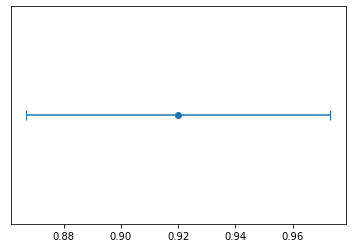

In [49]:
y = 1
dx = stats.norm.ppf(0.975)*np.sqrt(p*(1-p)/n)
plt.errorbar(p, y, xerr=dx, fmt='o',capsize=5)
ax = plt.gca()#убираем шкалу на оси y
ax.axes.yaxis.set_visible(False)

## Задание 3 - Известная дисперсия


Эта выборка была сгенерирована из распределения Гаусса с среднеквадратическим отклонением равным 2. Постройте и визуализируйте 95% доверительный интервал.

In [50]:
sample = np.array([5.36428472, 2.87270749, 3.79579422, 1.81623121, 3.03077013,
       0.281269  , 6.67951761, 5.09422759, 1.66157597, 1.96382686,
       6.77651373, 1.79218128, 4.00224188, 5.74867019, 3.65659601,
       3.94996752, 6.71222088, 1.49256572, 5.26352312, 0.38649412,
       3.83673665, 1.63189618, 0.20819875, 3.25041033, 2.85553651,
       2.23529588, 2.87192192, 4.85007667, 5.75926821, 4.01132092,
       4.34500618, 1.12967271, 1.26053554, 0.62453852, 4.56591695,
       6.52359019, 2.93093645, 3.63040108, 3.69353413, 6.8668287 ])

In [97]:
sigma = 2
x_avg = np.mean(sample)
theta

3.485570043

In [98]:
low = x_avg - stats.norm.ppf(0.975)*sigma/np.sqrt(len(sample))#нижняя граница
low

2.8657750106954385

In [99]:
high = x_avg + stats.norm.ppf(0.975)*sigma/np.sqrt(len(sample))#верхняя граница
high

4.105365075304562

In [100]:
x = np.linspace(low, high, 100)

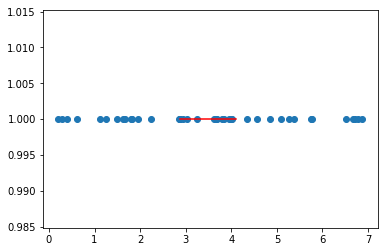

In [101]:
_ = plt.scatter(x = sample, y = np.ones(len(sample)))
_ = plt.plot(x, np.ones(100), color = 'red')
plt.show()

## Задание 4 - Конфеты

На фабрике конфет менеджер в отделе упаковки волнуется, что упаковочная машина имеет слишком большой разброс веса при производстве упаковок. Фабрика пишет, что одна упаковка содержит 52 грамма. Отдел контроля за качеством производит случайную выборку 10 упаковок. Дисперсия выборки составляет 4.2 квадратных грамма. Менеджер упаковки приходит к вам в отдел аналитики и спрашивает, какое среднеквадратичное отклонение от 52 грамм он может ожидать при производстве. Он помнит, что на одном из курсов слышал, что-то о 95% доверительном интервале. Какой ответ вы ему дадите?

In [2]:
n = 9
var_hat = 4.2

In [3]:
low = (n-1)*var_hat/stats.chi2.ppf(0.975,10)
high = (n-1)*var_hat/stats.chi2.ppf(0.025,10)

In [4]:
print(low, high)#границы дисперсии

1.6403705062230292 10.348100299611732


In [5]:
print(np.sqrt(low), np.sqrt(high))#границы для среднеквадратичного отклонения

1.2807694976938782 3.2168463282556305


С вероятностью 95% среднеквадратичное отклонение лежит в интервале от 1.28 до 3.22 грамма

## Задание 5 - Машина упаковки

Менеджер хочет теперь получить более точные данные о разбросе веса и собирает выборку из 20 упаковок. Их вес показан снизу. Он хочет получить от вас 95% интервал доверия для их веса. Визуализируйте интервал доверия, а также вашу оценку среднего значения. Как вы думаете, должен ли он что-то изменить в установках машины?

In [11]:
sample_2= np.array([57.15345904, 54.81682818, 55.97949282, 52.74585138, 52.69227923,
       54.14488711, 52.87589871, 51.60408396, 52.86402956, 52.54558302,
       58.70424448, 53.68106774, 55.19394233, 51.44826275, 52.23140559,
       53.08316454, 52.55819766, 55.83164938, 55.24344808, 52.98465699])

In [12]:
n = 20
k = n-1
x_avg = np.mean(sample_2)
s = np.std(sample_2)
x_avg

53.91912162750001

In [110]:
low = x_avg - stats.t.ppf(0.975,k)*s/np.sqrt(n)
high = x_avg + stats.t.ppf(0.975,k)*s/np.sqrt(n)

In [111]:
print(low, high)#доверительный интервал

53.04191795409775 54.796325300902275


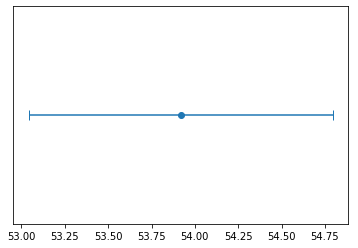

In [112]:
y = 1
dx = stats.t.ppf(0.975,k)*s/np.sqrt(n)
plt.errorbar(x_avg, y, xerr=dx, fmt='o',capsize=5)
ax = plt.gca()#убираем шкалу на оси y
ax.axes.yaxis.set_visible(False)

Нижняя граница доверительного интервала 53гр, при этом заявленаня масса упаковки 52гр, значит надо изменить настройки таким образом, чтобы понизить нижнюю и верхнюю границы доверительного интервала. 

## Задание 6  - Независимый работник

Вы независимый аналитик и получили от клиента анонимизированные данные. Он уверяет вас, что это случайная выборка, но не дает больше деталей и просит найти 99% интервал доверия для среднего значения.

Вот эти данные, что вы ему отвечаете? 

In [13]:
data= np.array([-2.99900196e+00, -3.44369276e+00,  1.23769282e+00, -2.65611525e-01,
        1.18905926e+00,  1.00830125e+01, -6.72010462e-01,  8.82324631e-01,
        4.98269264e-01,  3.58285214e-01, -4.34959057e-01, -4.06152797e-01,
       -1.14788848e-01,  5.04301538e+00,  1.14473833e-01, -1.91393602e-02,
       -1.75491519e+00, -1.45807412e+00,  1.28254527e-01,  7.48222204e-01,
       -7.57972159e-01,  9.39373422e-01, -4.88534574e-01, -2.67574551e+00,
        6.73400442e-01, -4.38650901e-02, -1.21512438e-01,  1.50985069e-01,
        2.39199965e-01,  2.98146043e+00, -1.25194060e+00,  3.87576306e-01,
       -2.02316304e+00, -1.82366204e+01,  2.77231480e-01, -3.01170057e-01,
       -1.33166123e+00, -1.71020343e-01, -1.94255147e+00, -9.02237682e-01,
        9.06007403e+00, -3.56702118e+00,  2.76273531e+00,  1.66646978e+00,
        6.16647579e-01, -1.31795695e-02, -4.30902519e-01,  1.13274415e-01,
        1.24699403e-01, -3.88598798e-01,  8.00046412e-02, -5.46523961e-01,
       -6.71178196e-01, -3.16431361e-01, -3.30810097e-01,  3.40068041e+01,
       -1.39373017e+00, -5.52357663e-01, -1.51521956e+00, -2.99055326e+01])

In [14]:
n = len(data)# n>30
n

60

In [15]:
x_avg = np.mean(data)
s = np.std(data)
x_avg

-0.11808800569333334

In [16]:
low = x_avg - stats.norm.ppf(0.995,k)*s/np.sqrt(n)
high = x_avg + stats.norm.ppf(0.995,k)*s/np.sqrt(n)

In [17]:
print(low, high)#доверительный интервал для мат ожидания

-18.74582694781982 18.50965093643315


In [18]:
max(data)

34.0068041

In [19]:
min(data)

-29.9055326

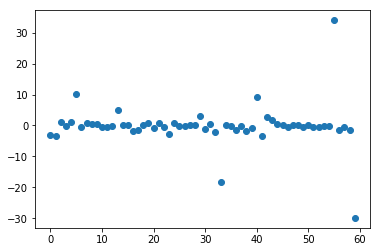

In [20]:
 _ = plt.scatter(np.arange(0,60), data)

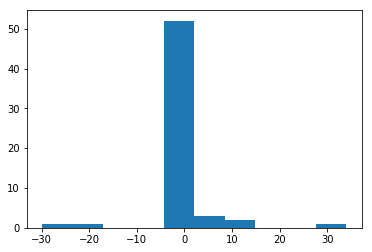

In [21]:
_ = plt.hist(data)

Наличие больших выбросов делает выборку непригодной для анализа.

## Задание 7  - Больше работы

Слух о вашей хорошей работе распространяется и к вам приходят все больше странных клиентов с анонимизированными данными. Один из них уверяет вас снова, что это случайная выборка, не дает больше деталей и просит найти 99% интервал доверия для среднего значения. Что вы ему отвечаете?

In [22]:
data2 = np.array([  7.87622162,  20.68877939,  14.14346304,  11.13812402,
        45.54428434,  16.44443675,   1.57282512,  10.84834663,
         6.30316072,  15.45398104,  24.67909631,   0.98596306,
         5.6523425 ,  16.24001979,  16.49876652,   6.91099052,
        40.87098117,  74.61922098,  19.70584746,  27.39066069,
        35.11674792,  23.24253023,  17.38074928,  10.33033992,
        15.20445056,   6.04045695,   4.96394734,   0.47267777,
        20.90168311,  60.63109643,   2.90984036,  16.32371122,
        27.64739412,   1.78555092,   1.89422223,   4.68021386,
        18.3809633 ,   4.87995248,  46.46988446,  53.37459189,
        12.86626685,  24.31005862,  21.05864743,  29.56060116,
        31.36476555,  14.58382079,   7.74390817,   9.09498609,
         8.79999174,  44.82920263,   0.87451342,  13.73520929,
        10.09951872,   6.82518183,   4.97327908,  51.2335441 ,
        49.19386905,  17.54039081,  71.76686803,   5.11286068,
        14.13318992,   8.87221737,   4.82898898,   9.32582429,
        18.02779373,  16.52043816,  24.54267197,   3.09383355,
       117.70196069,  23.45859733])

In [23]:
n = len(data2)# n>30
n

70

In [24]:
x_avg = np.mean(data2)
s = np.std(data2)
x_avg

20.46102165785714

In [25]:
low = x_avg - stats.norm.ppf(0.995,k)*s/np.sqrt(n)
high = x_avg + stats.norm.ppf(0.995,k)*s/np.sqrt(n)

In [26]:
print(low, high)#доверительный интервал для мат ожидания

-32.276181255247664 73.19822457096195


In [27]:
max(data2)

117.70196069

In [28]:
min(data2)

0.47267777

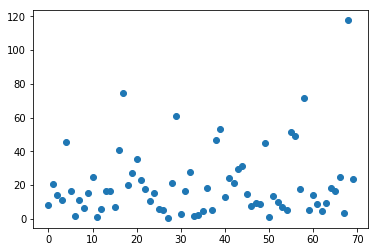

In [29]:
_ = plt.scatter(np.arange(0,70), data2)

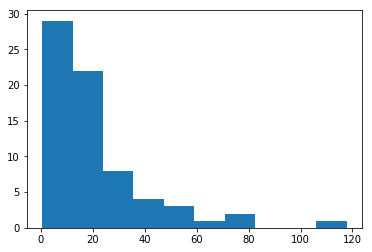

In [31]:
_ = plt.hist(data2)

По данной выборке нельзя провести корректный анализ, так как значения не имеют нормального распределения.